# 3. 语音识别任务

- 语音识别（ASR:Automatic Speech Recognition）的主要功能是声音转文字：
    - 将人类语音信号转换为计算机可读的文本格式。

- 语音识别有很多应用场景：
    - 企业与办公场景：会议记录
    - 媒体与娱乐行业：自动字幕
    - 医疗与健康行业：口述病历
    - 金融与商业行业：语音下单
    - 智能硬件与物联网：车载语音控制与语音助手

- 在Transformers中语音识别任务主要有两种：
    - 虚拟语音助手（Virtual Speech Assistants）
    - 字幕生成（Caption Generation）


## 3.1. 语音识别任务应用

- 语音识别任务，我们在HuggingFace上选择了三个模型：
    - `facebook/seamless-m4t-v2-large`
    - `openai/whisper-large-v3`与`openai/whisper-large-v3-turbo`
    - `microsoft/VibeVoice-ASR`

### (1) 下载`seamless-m4t-v2-large`模型

In [1]:
# 需要运行命令，先安装：pip install huggingface_hub
from huggingface_hub import snapshot_download
# 下载整个模型仓库
# 示例：下载bert-base-uncased
snapshot_download(
    repo_id="facebook/seamless-m4t-v2-large", 
    local_dir="F:/03Models/facebook/seamless-m4t-v2-large")

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

'F:\\03Models\\facebook\\seamless-m4t-v2-large'

- 我们下载准备了中英文测试音频文件。
    - 英文：
        - `./sounds/170145_0002.flac`
        - 标签为：`AND HE THREW IT BACK AT ME A SECOND TIME. SHE FELT THE STRENGTH LEAP IN THE ARMS THAT HELD HER SO LIGHTLY. TRY HIM AGAIN HILDA TRY HIM ONCE AGAIN`
    - 中文：
        - `./sounds/9832338951018379465.wav`

### (2) 模型应用 

- whisper-large-v3模型应用
    - Whisper是OpenAI公司Alec Radford等人在论文《通过大规模弱监督实现鲁棒的语音识别》中提出的一种用于自动语音识别和语音翻译的尖端模型。该模型在超过500万小时的标注数据上进行训练，展现了在零样本设置下对众多数据集和领域极强的泛化能力。Whisper-large-v3是OpenAI开发的 Whisper系列自动语音识别模型的最新版本（截至2023年底发布）。它是目前该系列中规模最大、性能最强的开源模型，。
    - 多语言与多任务：
        - 支持99种语言的语音转录，包括中文。
        - 可以执行多任务：**语音识别**、**语言识别**、**语音翻译**（将一种语言的语音翻译成另一种语言的文字）以及语音活动检测。
    - 大规模训练：
        - Whisper large-v3模型使用100 万小时的弱标注音频以及400万小时通过 Whisper large-v2收集的伪标注音频进行训练。模型在此混合数据集上共训练了 2.0 个周期，数据量远超其前代版本，这极大地提升了其在各种口音、背景噪音和专业术语上的鲁棒性和准确性。
    - 技术改进：
        - 与前代版本相比，它在处理带口音的语音、技术词汇、背景噪音以及标点符号预测方面有显著提升。
        - 改善了时间戳的准确性，支持单词级的时间戳输出。
    - 开源与免费：
        - 与之前的 Whisper 模型一样，v3 版本也完全开源（MIT 协议），可供研究者和开发者免费使用、微调和部署。

In [3]:
import torch
from transformers import pipeline

device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

pipe = pipeline(
    "automatic-speech-recognition",
    model="F:/03Models/whisper-large-v3",
    dtype=torch_dtype,
    device=device,
)


result1 = pipe("./sounds/170145_0002.flac")
print(result1)

result2 = pipe("./sounds/9832338951018379465.wav")
print(result2)


Device set to use cuda:0


{'text': ' and he threw it back at me a second time she felt the strength leap in the arms that held her so lightly try him again hilda try him once again'}
{'text': '水沙的地形造成回流集中于几处较深的区域,那里可能会形成流向深水的急流。'}


- 代码说明：
    - whisper-large-v3模型可以自动侦测语言，并转换为文本。
    - whisper-large-v3支持多语言转换。
    - 可以执行多任务：**语音识别**、**语言识别**、**语音翻译**（将一种语言的语音翻译成另一种语言的文字）以及语音活动检测。这些我们在下面技术分析中说明。

- `facebook/seamless-m4t-v2-large`模型应用
    - SeamlessM4T是我们基础性的一体化大规模多语言多模态机器翻译模型，可在近100种语言中实现语音与文本的高质量翻译。
    - SeamlessM4T模型支持以下任务：
        - 语音到语音翻译（S2ST）
        - 语音到文本翻译（S2TT）
        - 文本到语音翻译（T2ST）
        - 文本到文本翻译（T2TT）
        - 自动语音识别（ASR）
    - SeamlessM4T模型支持：
        - 🎤 101种语言的语音输入
        - 💬 96种语言的文本输入/输出
        - 🔊 35种语言的语音输出 

- 正式发布的SeamlessM4T v2，这是采用全新UnitY2架构的升级版本。该新模型在语音生成任务的质量和推理速度上均较SeamlessM4T v1有所提升。
    - SeamlessM4T v2是全新UnitY2架构的多任务适配版本。UnitY2凭借其分层字符到单元的向上采样和非自回归的文本到单元解码机制，在质量和推理速度上显著超越了SeamlessM4T v1。

In [4]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="F:/03Models/facebook/seamless-m4t-v2-large")
pipe("./sounds/preamble10.wav")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0
You must either specify a `tgt_lang` or pass a correct `text_decoder_input_ids` to get
                a correct generation, otherwise the generation will probably make no sense.


{'text': 'we the people of the united states in order to form a more perfect union establish justice ensure domestic tranquillity provide for the common defense'}

## 3.2. 语音识别任务技术分析

- Pippe及其相关的核心实现（Transformers v4.56.3）:
    - Pipeline：管道封装
        - PreTrainedModel：模型（Transformers的标准实现与第三方实现）
        - PreTrainedTokenizer：分词器（自然语言模型）
        - PreTrainedFeatureExtractor：特征抽取器（语音模型）
        - BaseImageProcessor：图像处理器（视觉模型）
        - ProcessorMixin：多模态处理器（它将不同模态（文本、图像、音频）的预处理组件（tokenizer, feature extractor 等）组合成一个统一的接口。）
        - ModelCard：提供模型的透明、标准化文档等信息（目前很少有模型提供）

### (1) Pipeline使用的技术分析whisper-large-v3

- whisper-large-v3相关的核心实现:
    - Pipeline：管道封装
        - PreTrainedModel：模型（Transformers的标准实现与第三方实现）
            - PretrainedConfig：模型配置
        - PreTrainedTokenizer：分词器（自然语言模型）
        - PreTrainedFeatureExtractor：特征抽取器（语音模型）
        - BaseImageProcessor：图像处理器（视觉模型）
        - ProcessorMixin：多模态处理器（它将不同模态（文本、图像、音频）的预处理组件（tokenizer, feature extractor 等）组合成一个统一的接口。）
        - ModelCard：提供模型的透明、标准化文档等信息（目前很少有模型提供）

In [6]:
import torch
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="F:/03Models/whisper-large-v3")
print(type(pipe))
print(type(pipe.model))
print(type(pipe.model.config))
print(type(pipe.tokenizer))
print(type(pipe.feature_extractor))
print(type(pipe.image_processor))
print(type(pipe.processor))
print(type(pipe.modelcard))


Device set to use cuda:0


<class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>
<class 'transformers.models.whisper.modeling_whisper.WhisperForConditionalGeneration'>
<class 'transformers.models.whisper.configuration_whisper.WhisperConfig'>
<class 'transformers.models.whisper.tokenization_whisper_fast.WhisperTokenizerFast'>
<class 'transformers.models.whisper.feature_extraction_whisper.WhisperFeatureExtractor'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>


- 代码说明:
    - `whisper-large-v3`模型是语音类模型，所以有如下几个核心组件（transformers.models.whisper）：
        - AutomaticSpeechRecognitionPipeline(ChunkPipeline(Pipeline))
        - WhisperForConditionalGeneration(WhisperGenerationMixin，WhisperPreTrainedModel(PreTrainedModel))
        - WhisperConfig(PretrainedConfig)
        - WhisperTokenizerFast(PreTrainedTokenizerFast)
        - WhisperFeatureExtractor(SequenceFeatureExtractor)
    - 对于语音模型来说没有image_processor，processor。
    - modelcard对象目前模型文件中提供的比较少，可以通过模型下载平台得到相关信息。

- AutomaticSpeechRecognitionPipeline类介绍
    - AutomaticSpeechRecognitionPipeline类明确的协作对象包含：
        - `_pipeline_calls_generate = True`
        - `_load_feature_extractor = True`
        - `_load_tokenizer = True`
        - - `_load_processor = False`
        - `_load_image_processor = False`
        - 注意:Pipeline类中的成员是定义了ModelCard对象的，但是不同的Pipeline实现子类都没有提供MModelCard属性。
    - AutomaticSpeechRecognitionPipeline类的属性（也是构造器参数）
        - model属性：类型为PreTrainedModel
        - type属性：取值"seq2seq_whisper"或者"seq2seq"或者"ctc_with_lm"或者ctc"
        - decoder属性：类型为BeamSearchDecoderCTC或者字符串。
        - tokenizer属性：类型为PreTrainedTokenizer
        - feature_extractor属性：类型为SequenceFeatureExtractor或者字符串。
        - device属性：int或者"torch.device"

- AutomaticSpeechRecognitionPipeline类的构造器
    - 构造器中很多参数会设置为属性。
    - 其中kwargs参数中可以设置与语音识别算法相关的参数，当处理长音频文件时（如会议录音、播客、讲座等），需要将长音频分割成重叠的块（chunks）分别处理，下面两个参数就是确定分块的长度与步长。
        - chunk_length_s参数
        - stride_length_s参数：默认是`chunk_length_s/6`，每段音频块（chunk）左右两侧的步进长度。仅当 chunk_length_s > 0时生效。该参数能让模型在推理时感知更多上下文信息，从而提升字母/音素的识别准确性；但为了最终重构出尽可能完整的音频，系统在处理完成后会丢弃步进部分的冗余数据。
```python
def __init__(
        self,
        model: "PreTrainedModel",
        feature_extractor: Optional[Union["SequenceFeatureExtractor", str]] = None,
        tokenizer: Optional[PreTrainedTokenizer] = None,
        decoder: Optional[Union["BeamSearchDecoderCTC", str]] = None,
        device: Optional[Union[int, "torch.device"]] = None,
        **kwargs,
    )
```

- AutomaticSpeechRecognitionPipeline类的核心函数，都可调用对象运算符，也是推理调用接口：
    - `def __call__(self, inputs: Union[np.ndarray, bytes, str, dict], **kwargs: Any) -> list[dict[str, Any]]:`
        - inputs参数：输入需要推理处理音频，音频格式可以是字符串（音频文件），音频文件的字节码（从文件直接读取的数据），numpy数组（使用feature_extractor解码后的音频特征），字典（使用独有字段设置的音频数据，该字典的关键字包含`{"sampling_rate": int, "raw": np.array, "stride": (left: int, right: int)}`(其中raw是使用soundfile模块读取的音频文件数组)，下面我们使用例子进一步说明）。
        - kwargs参数：
            - return_timestamps：参数类型逻辑值或者字符串，设置是否返回时间。这个只对纯CTC模型有用,对其他`sequence-to-sequence`模型无效。
                - 对CTC模型：
                    - "char"：返回`[{"text": "h", "timestamp": (0.5, 0.6)}, {"text": "i", "timestamp": (0.7, 0.9)}]`
                    - "word"：返回`[{"text": "hi ", "timestamp": (0.5, 0.9)}, {"text": "there", "timestamp": (1.0, 1.5)}]`
                - 对Whisper模型：
                    - "word"：等价于CTC的word参数。
                    - True：`[{"text": " Hi there!", "timestamp": (0.5, 1.5)}]`
        - generate_kwargs参数：
            - 来自`GenerationConfig`的参数。这里不详细介绍，我们使用专门主题最后介绍。

In [10]:
import torch
from transformers import pipeline
pipe = pipeline("automatic-speech-recognition", model="F:/03Models/whisper-large-v3")

result1 = pipe("./sounds/170145_0002.flac", return_timestamps="word")
print(result1)
print("*" * 80)
result2 = pipe("./sounds/9832338951018379465.wav", return_timestamps=True)
print(result2)

Device set to use cuda:0


{'text': ' and he threw it back at me a second time she felt the strength leap in the arms that held her so lightly try him again hilda try him once again', 'chunks': [{'text': ' and', 'timestamp': (0.0, 0.28)}, {'text': ' he', 'timestamp': (0.28, 0.46)}, {'text': ' threw', 'timestamp': (0.46, 0.68)}, {'text': ' it', 'timestamp': (0.68, 0.8)}, {'text': ' back', 'timestamp': (0.8, 1.0)}, {'text': ' at', 'timestamp': (1.0, 1.22)}, {'text': ' me', 'timestamp': (1.22, 1.38)}, {'text': ' a', 'timestamp': (1.38, 1.62)}, {'text': ' second', 'timestamp': (1.62, 1.9)}, {'text': ' time', 'timestamp': (1.9, 2.3)}, {'text': ' she', 'timestamp': (2.3, 3.7)}, {'text': ' felt', 'timestamp': (3.7, 4.04)}, {'text': ' the', 'timestamp': (4.04, 4.26)}, {'text': ' strength', 'timestamp': (4.26, 4.6)}, {'text': ' leap', 'timestamp': (4.6, 5.0)}, {'text': ' in', 'timestamp': (5.0, 5.22)}, {'text': ' the', 'timestamp': (5.22, 5.32)}, {'text': ' arms', 'timestamp': (5.32, 5.68)}, {'text': ' that', 'timestamp'

- 参数使用的例子

In [11]:
import torch
from transformers import pipeline
pipe = pipeline("automatic-speech-recognition", model="F:/03Models/whisper-large-v3")

result = pipe("./sounds/9832338951018379465.wav", return_timestamps=True, chunk_length_s=10)
print(result)

Device set to use cuda:0
Using `chunk_length_s` is very experimental with seq2seq models. The results will not necessarily be entirely accurate and will have caveats. More information: https://github.com/huggingface/transformers/pull/20104. Ignore this warning with pipeline(..., ignore_warning=True). To use Whisper for long-form transcription, use rather the model's `generate` method directly as the model relies on it's own chunking mechanism (cf. Whisper original paper, section 3.8. Long-form Transcription).


{'text': '水下的地形造成回流集中于几处较深的区域那里可能会形成流向深邃的急流。', 'chunks': [{'timestamp': (0.0, 7.44), 'text': '水下的地形造成回流集中于几处较深的区域'}, {'timestamp': (7.44, 11.33), 'text': '那里可能会形成流向深邃的急流。'}]}


- 代码说明：
    - 使用 chunk_length_s对seq2seq模型（如Whisper）进行分块处理是高度实验性功能。其输出结果未必完全准确，且存在一定限制。

- 输入的数据格式：
    - str：设置推理处理的音频文件名。
    - numpy.ndarray：解码后的音频文件.
    - bytes：读取的音频文件字节码
    - dict：`{"sampling_rate": int, "raw": np.array, "stride": (left: int, right: int)}`

- inputs参数为str的例子：
    - 音频文件名。

In [14]:
import torch
from transformers import pipeline
pipe = pipeline("automatic-speech-recognition", model="F:/03Models/whisper-large-v3")


result1 = pipe("./sounds/9832338951018379465.wav")
print(result1)
print("*" * 80)

Device set to use cuda:0


{'text': '水沙的地形造成回流集中于几处较深的区域,那里可能会形成流向深水的急流。'}
********************************************************************************


- inputs参数为bytes的例子

In [15]:
with open("./sounds/9832338951018379465.wav", "rb") as fd:
    bytes_sounds = fd.read()
result2 = pipe(inputs=bytes_sounds)
print(result2)
print("*" * 80)


{'text': '水沙的地形造成回流集中于几处较深的区域,那里可能会形成流向深水的急流。'}
********************************************************************************


- inputs参数为dict与numpy.ndarray的例子

In [18]:
import soundfile as sf
# 读取音频
audio, sr = sf.read("./sounds/9832338951018379465.wav")
print(type(audio))
result3 = pipe(
    inputs={
        "array": audio,   # "raw": audio,
        "sampling_rate": sr,
        "stride": (5, 5)
    })
print(result3)
print("*" * 80)

result4 = pipe(inputs=audio)
print(result4)
print("*" * 80)

<class 'numpy.ndarray'>
{'text': '水沙的地形造成回流集中于几处较深的区域,那里可能会形成流向深水的急流。'}
********************************************************************************
{'text': '水沙的地形造成回流集中于几处较深的区域,那里可能会形成流向深水的急流。'}
********************************************************************************


- 代码说明：
    - 其中字典的raw关键字可以使用array（从源代码可以得知，文档中没有说明）。

### (2) preprocess，forward，postprocess协作工作的技术分析whisper-large-v3

- AutomaticSpeechRecognitionPipeline的__call__函数的调用包含三个阶段（伪代码）：
    - `model_inputs = preprocess(inputs, chunk_length_s=0, stride_length_s=None)`
        - 预处理：feature_extractor
    - `model_outputs = forward(model_inputs, return_timestamps=False, **generate_kwargs)`
        - 模型调用：model
    - `postprocess(model_outputs, decoder_kwargs: Optional[dict] = None, return_timestamps=None, return_language=None)`
        - 后处理：tokenizer, decoder

- 在Pipeline的调用中，Tansformers的实现流程如下：
    - 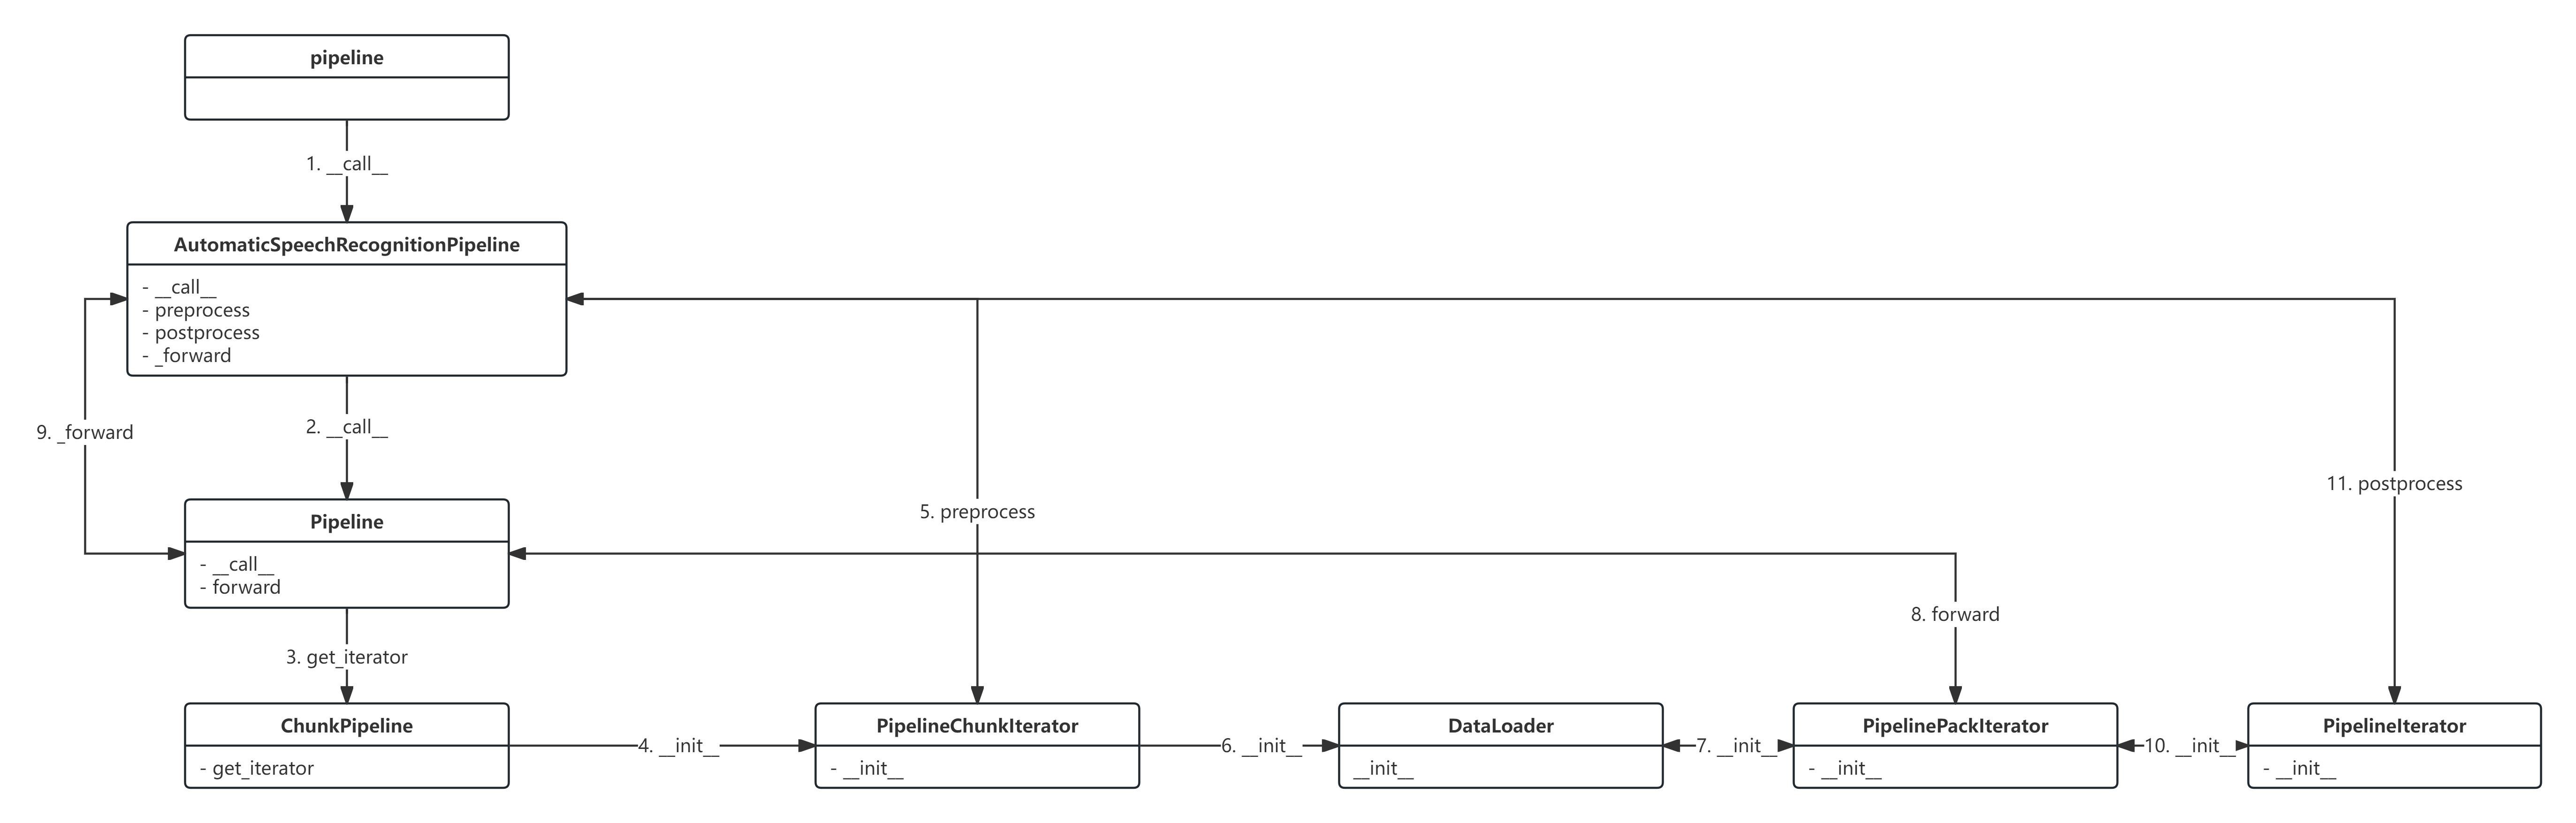

- preprocess函数的调用（预处理）

In [8]:
import torch
from transformers import pipeline
pipe = pipeline("automatic-speech-recognition", model="F:/03Models/whisper-large-v3")

model_inputs = pipe.preprocess("./sounds/9832338951018379465.wav")
model_inputs = next(model_inputs)
model_inputs

Device set to use cuda:0


{'is_last': True,
 'input_features': tensor([[[-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
          [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
          [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
          ...,
          [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
          [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
          [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315]]],
        dtype=torch.float16),
 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]], dtype=torch.int32),
 'num_frames': tensor([1524])}

- forward函数的调用(模型调用)

In [15]:
model_outputs = pipe.forward(model_inputs, return_timestamps=True)
print(model_outputs)

{'is_last': True, 'tokens': tensor([[50365, 15590,  3308,   247,  1546, 10928, 30900, 37583, 11336,  8350,
         27854, 26020,  5975, 37732,  6336,   254,  1787,   226,  9830,   225,
         24043,  1546,  9937,   118, 16262,   253, 50727, 50727,  4184, 15759,
         16657, 12949, 30900, 11336, 27854, 24282, 24043, 15590,  1546, 36379,
         27854, 50931]])}


- postprocess函数的调用（后处理）

In [16]:
model_outputs.pop("is_last")
print(model_outputs)
result = pipe.postprocess([model_outputs], return_timestamps=True)
print(result)

{'tokens': tensor([[50365, 15590,  3308,   247,  1546, 10928, 30900, 37583, 11336,  8350,
         27854, 26020,  5975, 37732,  6336,   254,  1787,   226,  9830,   225,
         24043,  1546,  9937,   118, 16262,   253, 50727, 50727,  4184, 15759,
         16657, 12949, 30900, 11336, 27854, 24282, 24043, 15590,  1546, 36379,
         27854, 50931]])}
{'text': '水沙的地形造成回流集中于几处较深的区域那里可能会形成流向深水的急流', 'chunks': [{'timestamp': (0.0, 7.24), 'text': '水沙的地形造成回流集中于几处较深的区域'}, {'timestamp': (7.24, 11.32), 'text': '那里可能会形成流向深水的急流'}]}


### (3) 预处理-preprocess

- 与处理主要是把输入数据处理为模型需要的数据类型与格式。
    - 其中需要对同的音频数据格式进行适配处理：
        - 如果输入的是音频文件的处理方式。
            - 如果是`http://`或者`https://`开头，则调用request下载音频文件为字节码。
            - 如果是本地文件，则使用open打开文件，并使用read读取为字节码。
        - 如果输入的是音频字节的处理方式。
            - 调用ffmpeg_read按照指定的采样率，把字节码读取为numpy.ndarray数组。
        - 如果输入的是soundfile模块读取的音频数组（np.ndarray）的处理方式。
            -  np.ndarray是预处理的标准格式。前面两种方式都会转换为np.ndarray格式。
        - 如果输入的是字典的处理方式。
            - 字典格式的目的是，通过关键字sampling_rate指定重采样率，会多raw或者array关键字指定的np.ndarray音频数据进行重采样。并进行stride的处理。
    - 其中需要对音频的特征抽取，这需要使用到feature_extractor特征抽取器。
        - 其中如果指定了chunk_length_s，则对音频分块，并调用feature_extractor进行特征抽取。
        - 否则根据模型的类型，以及数据的数量、stride的等数据，调用feature_extractor进行特征抽取。
            - stride是输入为字典格式时指定的。
    - 与处理中特征抽取根据不同输入而有所不同，但输入的是单纯的音频数据，则调用方式如下：

```python
processed = feature_extractor(
    inputs, 
    sampling_rate=feature_extractor.sampling_rate,
    return_tensors="pt",
    return_token_timestamps=True,
    return_attention_mask=True,
)
```

- 预处理的结果是一个字典：
    - 包含如下两个字段：
        - num_frames字段：音频帧数。
        - input_features字段：音频特征。
        - attention_mask字段：注意力的掩码。
    - 预处理最后，还对feature_extractor的结果作了如下处理：
        - 把结果转化为Pipeline的dtype一致。
        - 增加了"is_last":True字段。
        - 使用yield返回为生成器对象。

In [24]:
# Load model directly
from transformers import AutoProcessor
from transformers import WhisperFeatureExtractor 
# 1. 第一种特征抽取器的生成方式
processor = AutoProcessor.from_pretrained("F:/03Models/whisper-large-v3")
print(processor.feature_extractor)

# 2. 第二种特征抽取器的生成方式
feature_extractor = WhisperFeatureExtractor .from_pretrained("F:/03Models/whisper-large-v3")
print(feature_extractor)

WhisperFeatureExtractor {
  "chunk_length": 30,
  "dither": 0.0,
  "feature_extractor_type": "WhisperFeatureExtractor",
  "feature_size": 128,
  "hop_length": 160,
  "n_fft": 400,
  "n_samples": 480000,
  "nb_max_frames": 3000,
  "padding_side": "right",
  "padding_value": 0.0,
  "processor_class": "WhisperProcessor",
  "return_attention_mask": false,
  "sampling_rate": 16000
}

WhisperFeatureExtractor {
  "chunk_length": 30,
  "dither": 0.0,
  "feature_extractor_type": "WhisperFeatureExtractor",
  "feature_size": 128,
  "hop_length": 160,
  "n_fft": 400,
  "n_samples": 480000,
  "nb_max_frames": 3000,
  "padding_side": "right",
  "padding_value": 0.0,
  "processor_class": "WhisperProcessor",
  "return_attention_mask": false,
  "sampling_rate": 16000
}



- 特征抽取器的使用：
    - 注意输入的格式为np.ndarray类型（shape为一维）与格式。

In [25]:
import soundfile as sf
from transformers import WhisperFeatureExtractor 

# 加载特征抽取器
feature_extractor = WhisperFeatureExtractor .from_pretrained("F:/03Models/whisper-large-v3")

# 读取音频
audios, sr = sf.read("./sounds/9832338951018379465.wav")

# 调用特征抽取器
model_inputs = feature_extractor(
    audios, 
    sampling_rate=feature_extractor.sampling_rate,
    return_tensors="pt",
    return_token_timestamps=True,
    return_attention_mask=True,
)
print(model_inputs)

<class 'transformers.models.whisper.feature_extraction_whisper.WhisperFeatureExtractor'>
{'input_features': tensor([[[-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         ...,
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315]]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]], dtype=torch.int32), 'num_frames': tensor([1524])}


### (4) 模型调用-forward

- forward的核心是模型调用：
    - 重点是需要把预处理的数据处理为模型可以使用的类型与格式。
    - 而且为了保留更多信息，可以使用字典返回模型处理后的数据。
    - 其中生成结果的配置参数在模型。

In [27]:
# Load model directly
from transformers import AutoModelForSpeechSeq2Seq
model = AutoModelForSpeechSeq2Seq.from_pretrained("F:/03Models/whisper-large-v3")
print(type(model.generation_config))   # 可以直接输出数据。这些配置都是模型在推理需要的基本配置

<class 'transformers.generation.configuration_utils.GenerationConfig'>


- 把输入的数据与generation_config一起做为参数输入模型进行推理

In [9]:
import soundfile as sf
from transformers import WhisperFeatureExtractor 
from transformers import AutoModelForSpeechSeq2Seq

# 1. 推理前的输入数据特征处理
# 加载特征抽取器
feature_extractor = WhisperFeatureExtractor .from_pretrained("F:/03Models/whisper-large-v3")

# 读取音频
audios, sr = sf.read("./sounds/9832338951018379465.wav")

# 调用特征抽取器
model_inputs = feature_extractor(
    audios, 
    sampling_rate=feature_extractor.sampling_rate,
    return_tensors="pt",
    return_token_timestamps=True,
    return_attention_mask=True,
)
print(model_inputs)

# 2. 模型的输入数据处理
model = AutoModelForSpeechSeq2Seq.from_pretrained("F:/03Models/whisper-large-v3")
generate_kwargs = {}
generate_kwargs["return_timestamps"] = True   # 
generate_kwargs["return_token_timestamps"] = False      # 设置word的时候，这个参数必须设置为True(数据过于复杂，我们设置为False)
generate_kwargs["return_segments"] = False              # 设置word的时候，这个参数必须设置为True
generate_kwargs["generation_config"] = model.generation_config


attention_mask = model_inputs.pop("attention_mask", None)
stride = model_inputs.pop("stride", None)
num_frames = model_inputs.pop("num_frames", None)
is_last = model_inputs.pop("is_last", None)
inputs = model_inputs.pop("input_features")   # 这个必须有。

main_input_name = model.main_input_name if hasattr(model, "main_input_name") else "inputs"   # 输入数据的字段名
print(main_input_name)
# 最终的推理生成参数
generate_kwargs = {
    main_input_name: inputs,
    "attention_mask": attention_mask,
    **generate_kwargs,
}

# 调用模型进行推理
tokens = model.generate(**generate_kwargs)
# 如果return_token_timestamps=True，输出是一个字典，数据太长，在jupyter输出会终止
print(tokens) 

{'input_features': tensor([[[-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         ...,
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315]]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]], dtype=torch.int32), 'num_frames': tensor([1524])}
input_features
tensor([[50365, 15590,  4438,  1546, 10928, 30900, 37583, 11336,  8350, 27854,
         26020,  5975, 37732,  6336,   254,  1787,   226,  9830,   225, 24043,
          1546,  9937,   118, 16262,   253, 50727, 50727,  4184, 15759, 16657,
         12949, 30900, 11336, 27854, 24282, 24043, 15590,  1546, 36379, 27854,
         50931]])


### (5) 后处理-postprocess

- 后处理，主要调用tokenizer进行文本解码。
    - 调用tokenizer的时候，主要把前面处理好的数据，在按照tokenizer需要的格式输入即可。

In [4]:
import soundfile as sf
from transformers import WhisperFeatureExtractor 
from transformers import AutoModelForSpeechSeq2Seq
from transformers import WhisperTokenizerFast

# 1. 推理前的输入数据特征处理
# 加载特征抽取器
feature_extractor = WhisperFeatureExtractor .from_pretrained("F:/03Models/whisper-large-v3")

# 读取音频
audios, sr = sf.read("./sounds/9832338951018379465.wav")

# 调用特征抽取器
model_inputs = feature_extractor(
    audios, 
    sampling_rate=feature_extractor.sampling_rate,
    return_tensors="pt",
    return_token_timestamps=True,
    return_attention_mask=True,
)
print(model_inputs)

# 2. 模型的输入数据处理
model = AutoModelForSpeechSeq2Seq.from_pretrained("F:/03Models/whisper-large-v3")
generate_kwargs = {}
generate_kwargs["return_timestamps"] = True   # 
generate_kwargs["return_token_timestamps"] = False      # 设置word的时候，这个参数必须设置为True(数据过于复杂，我们设置为False)
generate_kwargs["return_segments"] = False              # 设置word的时候，这个参数必须设置为True
generate_kwargs["generation_config"] = model.generation_config


attention_mask = model_inputs.pop("attention_mask", None)
stride = model_inputs.pop("stride", None)
num_frames = model_inputs.pop("num_frames", None)
is_last = model_inputs.pop("is_last", None)
inputs = model_inputs.pop("input_features")   # 这个必须有。

main_input_name = model.main_input_name if hasattr(model, "main_input_name") else "inputs"   # 输入数据的字段名

# 最终的推理生成参数
generate_kwargs = {
    main_input_name: inputs,
    "attention_mask": attention_mask,
    **generate_kwargs,
}

# 调用模型进行推理
tokens = model.generate(**generate_kwargs)

# 把token处理为tokenizer需要的输入格式
model_outputs = {
    "tokens": tokens
}

tokenizer = WhisperTokenizerFast.from_pretrained("F:/03Models/whisper-large-v3")

text, optional = tokenizer._decode_asr(
    [model_outputs],
    return_timestamps=True,
    return_language="zh",
    time_precision=0.02)
print(text)
print(optional)

{'input_features': tensor([[[-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         ...,
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315],
         [-0.8315, -0.8315, -0.8315,  ..., -0.8315, -0.8315, -0.8315]]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0]], dtype=torch.int32), 'num_frames': tensor([1524])}
input_features
水下的地形造成回流集中于几处较深的区域那里可能会形成流向深水的急流
{'chunks': [{'language': None, 'timestamp': (0.0, 7.24), 'text': '水下的地形造成回流集中于几处较深的区域'}, {'language': None, 'timestamp': (7.24, 11.32), 'text': '那里可能会形成流向深水的急流'}]}


- 提示：
    - 不同的算法，上面的实现过程是不同的，比如：
        - seamless-m4t-v2-large
        - VibeVoice-ASR
    - 我们进行模型的技术分析，是方便我们利用模型来训练自己的数据集。因为pipeline函数封装了很多技术细节，所以我们分析技术的重点是：
        - 模型调用前的数据处理。
        - 模型调用后的数据处理（实际训练的时候是没有后处理的，可以直接利用模型的输出，计算损失，并自动求导后反向迭代权重参数）。
        - 模型的调用中的生成参数，可以确保参数转换为ID。

----